<a href="https://colab.research.google.com/github/ameyvadnere/CS418-Statistical-Pattern-Recognition-Lab/blob/master/Assn1_Q1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import mnist
import numpy as np
from tqdm.notebook import tqdm
import seaborn as sns
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [5]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X.reshape(60000, 784)/255.
test_X = test_X.reshape(10000, 784)/255.

In [6]:
def compute_ratepars(train_X, train_y, classes=list(range(10))):
    ratepars = []
    priors = []
    k = train_X.shape[1]

    for i in tqdm(range(len(classes))):
        filter = np.where(train_y == classes[i])
        X = train_X[filter]

        ratepar = 1/(np.mean(X, axis=0) + 1e-16)
        count = X.shape[0]

        ratepars.append(ratepar)
        priors.append(count/train_X.shape[0])

    return ratepars, priors

In [7]:
ratepars, priors = compute_ratepars(train_X, train_y, classes=list(range(10)))

In [8]:
def show_ratepars(ratepars):
    fig = plt.figure(figsize=(10,10))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(len(ratepars)):
        
        ax = fig.add_subplot(4, 3, i+1, xticks=[], yticks=[])
        ax.imshow(ratepars[i].reshape(28,28))
    
    plt.show()

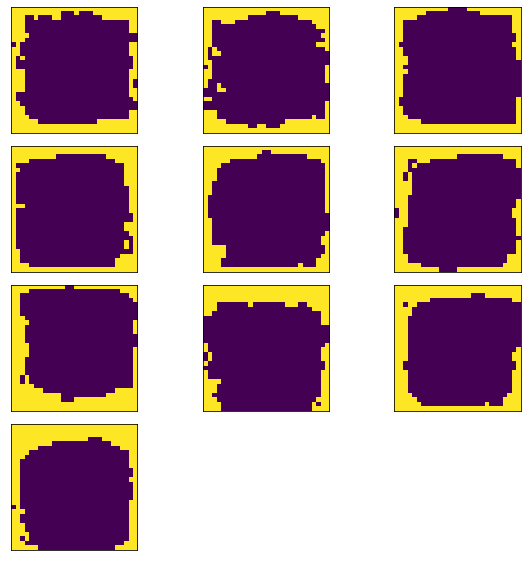

In [9]:
show_ratepars(ratepars)

In [10]:
def posterior(X, i):

    ratepar, prior = ratepars[i], priors[i]    
    return np.log(np.sum(ratepar)) - np.matmul(X, ratepar)




In [13]:
def predict(X):
    posteriors = []
    for i in range(0,10):
        probs = posterior(X, i)
        posteriors.append(probs)
    
    return np.argmax(posteriors, axis=0)


In [16]:
preds = predict(test_X)

In [17]:
print(np.mean(preds == test_y))

0.7181


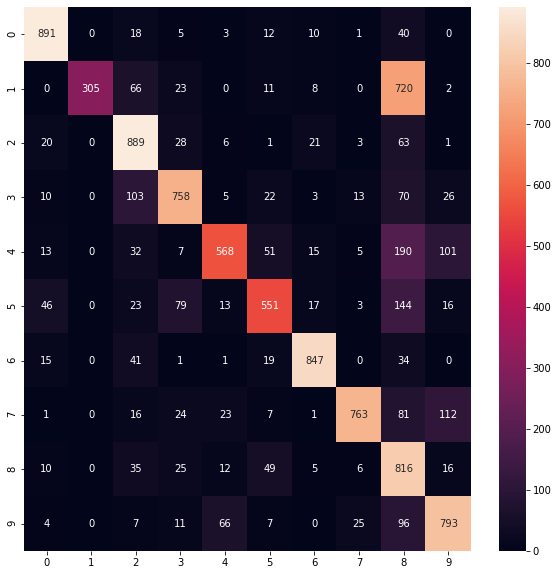

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, preds)
np.unique(preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f')